# Assignment Week 1 - Group 5

### Noelani Roy, Yihong Qiu, Cosimo Cambi, Craig Perkins

In [2]:
import pandas as pd
import numpy as np

In [3]:
filename = "../PS_20174392719_1491204439457_log.csv"

fraud_df = pd.read_csv(filename)

# print(fraud_df)

In [9]:
print(fraud_df.shape)

(6362620, 11)


In [ ]:
# from pandasgui import show

# show(fraud_df.head(100), settings={'block': True})

In [5]:
fraud_df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


<AxesSubplot:>

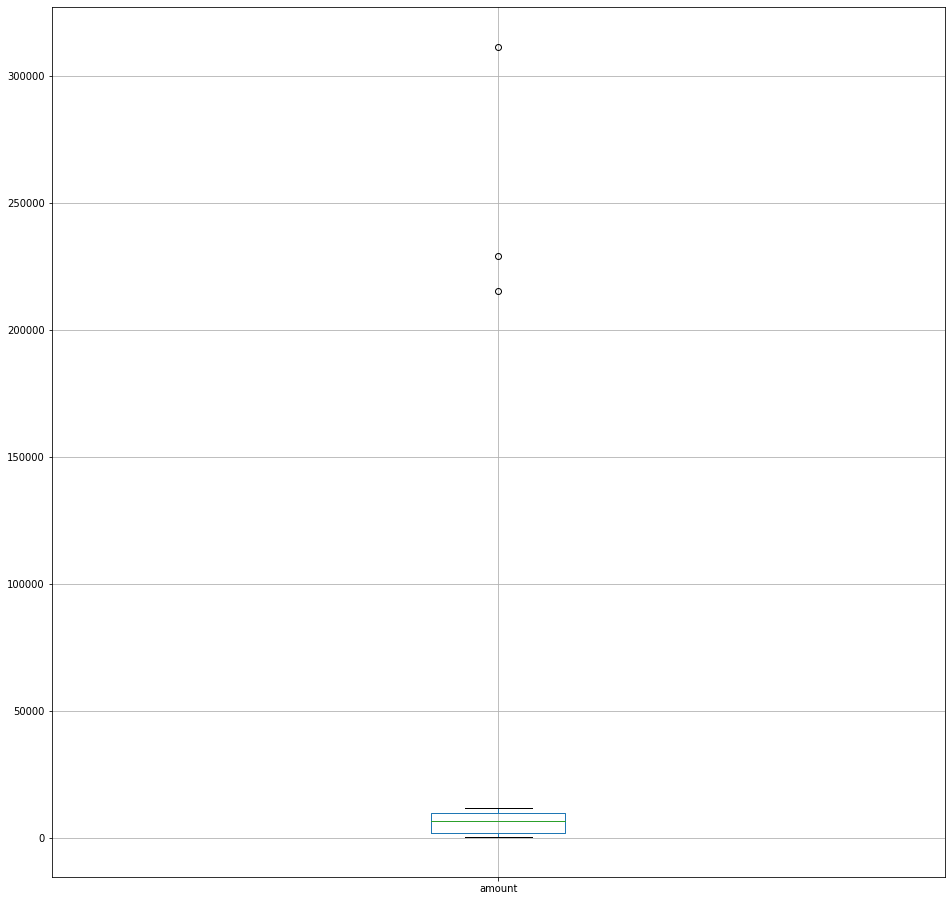

In [12]:
fraud_df.head(30).boxplot(column='amount', figsize=(16, 16))

In [13]:
print(fraud_df.head(30))

    step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   